### Installing libraries
- python version 3.7.4
- pip install pandas
- pip install fsspec
- pip install seaborn
- pip install matplotlib
- pip install sklearn
- pip install shap
- pip install xgboost

## This notebook is divided into 3 sections
1. Data cleaning and exploratory data analysis
2. Feature importance - Feature selection
3. Training model - Evaluation - Interpretation

### Dataset link
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Attribute Information:

Only 14 attributes used:
- 1. #3 (age) : age in years 
- 2. #4 (sex) : sex (1 = male; 0 = female)
- 3. #9 (cp) : chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- 4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)
- 5. #12 (chol) : serum cholestoral in mg/dl
- 6. #16 (fbs) :  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 7. #19 (restecg) : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 8. #32 (thalach) : thalach: maximum heart rate achieved
- 9. #38 (exang) : exercise induced angina (1 = yes; 0 = no)
- 10. #40 (oldpeak) : ST depression induced by exercise relative to rest
- 11. #41 (slope) : the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- 12. #44 (ca) : number of major vessels (0-3) colored by flourosopy
- 13. #51 (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect
- 14. #58 (num) (the predicted attribute) : diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

#### Categorical
- cp
- restecg
- slope
- thal
- Binary:
    - sex
    - fbs
    - exang

#### Ordinal
- ca

#### Numeric
- age
- oldpeak
- trestbps
- chol
- thalach

## Imports

In [1]:
# Python imports
import numpy as np
import pandas as pd

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# Outlier detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


import xgboost
import shap

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
colnames = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs',
                             'restecg', 'thalach', 'exang', 'oldpeak',
                             'slope', 'ca', 'thal', 'heart_disease']

df = pd.read_csv('./processed.cleveland.data',
                    names = colnames)
df[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [5]:
df['age'].median()

56.0

In [6]:
df['age'].mean()

54.43894389438944

In [11]:
pd.isnull(df['age']).values.any()

False

In [12]:
df[2:4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [22]:
mask_boolean = np.random.rand(len(df))>0.8
mask_boolean[:5]

array([False,  True, False, False, False])

In [38]:
~mask_boolean[:5]

array([ True, False,  True,  True,  True])

In [23]:
df[mask_boolean]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
14,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
17,54.0,1.0,4.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0,0
19,49.0,1.0,2.0,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,3.0,0
24,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
31,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2
35,42.0,1.0,4.0,140.0,226.0,0.0,0.0,178.0,0.0,0.0,1.0,0.0,3.0,0
39,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
44,61.0,0.0,4.0,130.0,330.0,0.0,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1
46,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0,0


In [37]:
df.iloc[[1,2,3]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


In [39]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [40]:
np.random.permutation(df.index)

array([141,  47,  71, 271, 176, 283, 300,  25,  96, 194,   2, 225, 186,
       207,   8,  72, 206,  68, 122,  13, 127, 242, 104,  98,  75,  38,
       269,  26, 105, 239, 197, 108, 120, 119,  28,  61,   6,  31, 169,
        80, 179, 114, 158,  55, 293, 232, 190, 226, 302, 110, 205, 118,
       199,  52, 157, 167,  67, 144, 156,  41,  20, 247, 202, 259, 175,
        91, 297,  14, 257, 201, 123, 111, 248, 233, 272,  37,  79, 208,
        10,  93, 214,  36, 168, 254,  70, 148,  45,  21, 231,  49, 161,
       252, 301,  73, 116, 266, 246, 251, 204, 183, 184, 241, 223,  77,
       109, 153,  17,  97, 143,  11, 133, 281,  53, 273, 187, 129, 284,
       134, 299, 193, 151,  57, 113,   3, 218,  66, 240, 106, 234, 163,
       140, 290,  83,  39,  15, 171, 154,  22, 288, 255, 130,  90, 196,
       258,  23, 162,  74,  24,  32, 125,  33,  54, 174, 267, 215, 295,
       188,  89, 177, 256, 150, 291, 173, 147, 270, 220, 264,  78, 245,
        86, 289, 165, 136, 203,  88, 213, 250, 229, 124,  50,  5

In [41]:
df_2 = df.reindex( np.random.permutation(df.index) )
df_2[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
175,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,1
291,55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
186,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0,0
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
93,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0


## ============================================
# 1. Data cleaning and exploratory data analysis
## ============================================

### Checking for NaN values

In [3]:
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64

#### Attention: Although the total NaN values was zero, after visual inspection I found some corrupted values '?' in 'ca' and 'thal'

In [4]:
df[86:89]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
86,47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,0
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
88,53.0,0.0,4.0,138.0,234.0,0.0,2.0,160.0,0.0,0.0,1.0,0.0,3.0,0


#### Checking for correpted data

In [5]:
def check_corruptions(df):
    rows_with_nan = []
    for col in df.columns:
        cnt_col_nan = (df[col] == '?').sum()
        print(f'Column {col}: num of corrupted values: {cnt_col_nan}')
        rows_with_nan.extend(df[ df[col] == '?' ].index)
    print('-'*35)
    print(f'Total corrupted values values: {len(rows_with_nan)}')
    rows_with_nan = sorted(list(set(rows_with_nan)))
    print(f'Row indices with corrupted data: {rows_with_nan}')
    return rows_with_nan

In [6]:
rows_with_nan = check_corruptions(df)

Column age: num of corrupted values: 0
Column sex: num of corrupted values: 0
Column cp: num of corrupted values: 0
Column trestbps: num of corrupted values: 0
Column chol: num of corrupted values: 0
Column fbs: num of corrupted values: 0
Column restecg: num of corrupted values: 0
Column thalach: num of corrupted values: 0
Column exang: num of corrupted values: 0
Column oldpeak: num of corrupted values: 0
Column slope: num of corrupted values: 0
Column ca: num of corrupted values: 4
Column thal: num of corrupted values: 2
Column heart_disease: num of corrupted values: 0
-----------------------------------
Total corrupted values values: 6
Row indices with corrupted data: [87, 166, 192, 266, 287, 302]


In [7]:
df.iloc[rows_with_nan]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Since there are only 6 rows out of the 303 that have missing values, a good strategy is to remove those rows

### If we had more missing values then we could 
    1. Cluster the samples based on the other features (e.g.  age, sex,..., slope) 
    2. Each sample containing a missing value will be placed in a cluster, based on the proximity of each features with the cluster centroids.
    3. Fill the missing values with an appropriate value from that cluster (i.e. average or a default value)

Drop rows and reset index

In [8]:
df = df.drop(rows_with_nan, axis=0)
df.reset_index(drop=True, inplace=True)
df[-3:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
296,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Convert heart disease types from range [1,4] to 1 for binary classification

In [9]:
df.loc[df['heart_disease']>0, 'heart_disease'] = 1
df[:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,heart_disease
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [11]:
### Save to csv
df.to_csv('./clean.cleveland.data.csv', index=False)

In [12]:
len(df)

297

## Outliers

Using different methods for outlier detection:

- IQR (statistical)
- Isolation Forest
- LOF (density based)

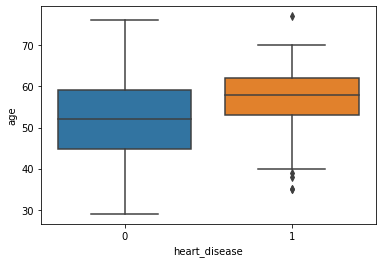

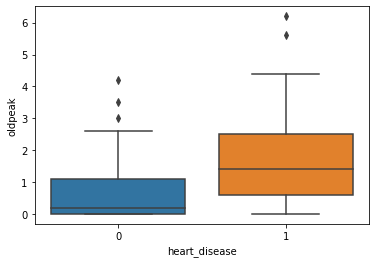

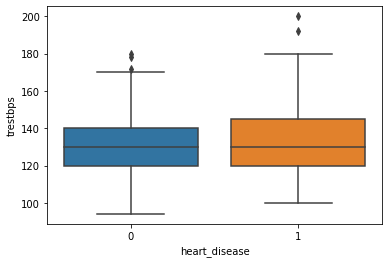

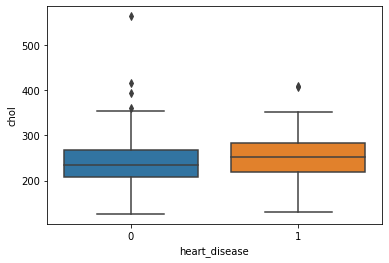

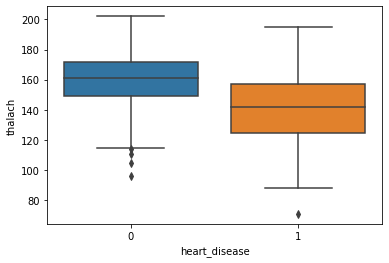

In [13]:
rows = 2
cols = 3

numeric_feats = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']

for i in range(len(numeric_feats)):
    sns.boxplot(x='heart_disease', y=numeric_feats[i], data=df)
    plt.show()

#### Search for outliers in the continuous variables

In [14]:
numeric_feats =  ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']

def outliersIQR(df):
    outlier_idx =[]
    for feat in df.columns:
        feature_data = df[feat]
        
        # find 25th and 75th percentile
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        
        #Interquartile Range
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        
        print(f'Number of outliers for feature {feat}: {len(outliers)}')
        outlier_idx.extend(outliers)
    print('-'*43)
    outlier_idx = sorted(list(set(outlier_idx)))
    print(f'Total IQR outliers: {len(outlier_idx)}')
    print(f'Indices containing outliers: {outlier_idx}')
    return outlier_idx

outlier_idx_IQR = outliersIQR(df[numeric_feats])

Number of outliers for feature age: 0
Number of outliers for feature oldpeak: 5
Number of outliers for feature trestbps: 9
Number of outliers for feature chol: 5
Number of outliers for feature thalach: 1
-------------------------------------------
Total IQR outliers: 19
Indices containing outliers: [14, 48, 83, 90, 120, 122, 125, 151, 170, 171, 179, 181, 186, 189, 198, 210, 228, 242, 281]


#### Before removing potential outliers perform more outlier detection methods. For robustness and too be conservative I classified as outliers only the samples that belong in the intersection of all three methods. 

#### Drop categorical variables - no notion of outliers there

In [15]:
X_all = df[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']]
X_all[:3]

,age,oldpeak,trestbps,chol,thalach
0,63.0,2.3,145.0,233.0,150.0
1,67.0,1.5,160.0,286.0,108.0
2,67.0,2.6,120.0,229.0,129.0


### Isolation forest

We do not need to normalize data before passing as input to isolation forest because by default it selects one feature to construct the tree. This means that the variation between scales of features doesn't matter

In [16]:
isol_forest_clf = IsolationForest(n_estimators=1000, random_state=0).fit(X_all)
isol_forest_preds = isol_forest_clf.predict(X_all)
isol_forest_outliers = np.argwhere(isol_forest_preds<0)
isol_forest_outliers

array([[  3],
       [ 29],
       [ 48],
       [ 68],
       [ 80],
       [ 83],
       [ 90],
       [ 92],
       [112],
       [116],
       [120],
       [122],
       [125],
       [131],
       [151],
       [154],
       [160],
       [168],
       [181],
       [186],
       [189],
       [198],
       [199],
       [208],
       [219],
       [222],
       [228],
       [242],
       [254],
       [269],
       [281],
       [291]], dtype=int64)

### Local Outlier Factor (LOF)

For Local Outlier Factor we need to normalize the data because it uses a similarity/distance based approach (similar to density based clusterings like DBSCAN)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled= scaler.fit_transform(df)  #numpy.ndarray

#Convert back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns = df.columns.to_list())
df_scaled[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,0.708333,1.0,0.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.0,0.75,0.0
1,0.791667,1.0,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.0,0.00,1.0


In [18]:
X_all_scaled = df_scaled[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']]
X_all_scaled[:3]

,age,oldpeak,trestbps,chol,thalach
0,0.708333,0.370968,0.481132,0.244292,0.603053
1,0.791667,0.241935,0.622642,0.365297,0.282443
2,0.791667,0.419355,0.245283,0.235160,0.442748


In [19]:
lof_clf = LocalOutlierFactor(n_neighbors=2)
preds_lof = lof_clf.fit_predict(X_all_scaled)
lof_outliers = np.argwhere(preds_lof<0)
lof_outliers

array([[  2],
       [  3],
       [ 82],
       [ 90],
       [103],
       [122],
       [128],
       [131],
       [132],
       [151],
       [154],
       [160],
       [184],
       [186],
       [189],
       [199],
       [202],
       [208],
       [219],
       [242],
       [249],
       [251],
       [273],
       [290]], dtype=int64)

#### Picking more neighbors to be more conservative

In [20]:
lof_clf = LocalOutlierFactor(n_neighbors=5)
preds_lof = lof_clf.fit_predict(X_all_scaled)
lof_outliers = np.argwhere(preds_lof<0)
lof_outliers

array([[  3],
       [ 90],
       [120],
       [151],
       [186],
       [251]], dtype=int64)

**Comment**: If the performance of the model is not adequate, we can come back and manually inspect the rest samples that were classified as potential outliers from the previous algorithms

In [21]:
def find_common_outliers(*lists):
    set0 = set(lists[0])
    for lst in lists[1:]:
        common_outliers = set(lst).intersection(set0)
    return sorted(list(common_outliers))

In [22]:
find_common_outliers(outlier_idx_IQR, isol_forest_outliers[:,0],  lof_outliers[:,0])

[90, 120, 151, 186]

#### Drop outliers

In [23]:
df = df.drop([90, 120, 151, 186], axis=0)
df.reset_index(drop=True, inplace=True)
len(df)

293

In [24]:
### Save to csv
df.to_csv('./clean.cleveland.data.csv', index=False)

### Load from csv
df = pd.read_csv('./clean.cleveland.data.csv',
                 dtype ={key:'float64' for key in colnames})

## ========================================
# 2. Feature importance - Feature selection
## ========================================

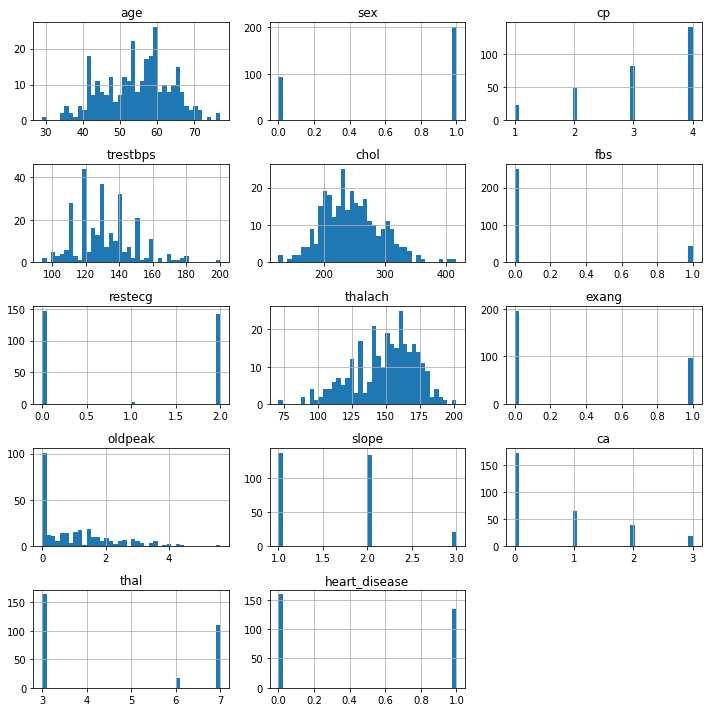

In [25]:
df.hist(column = df.columns, figsize=(10,10), bins=40, layout=(5,3))
plt.tight_layout()
plt.show()

### Feature selection

#### Find most correlated features with heart_disease
(This measures the **linear** association only!)

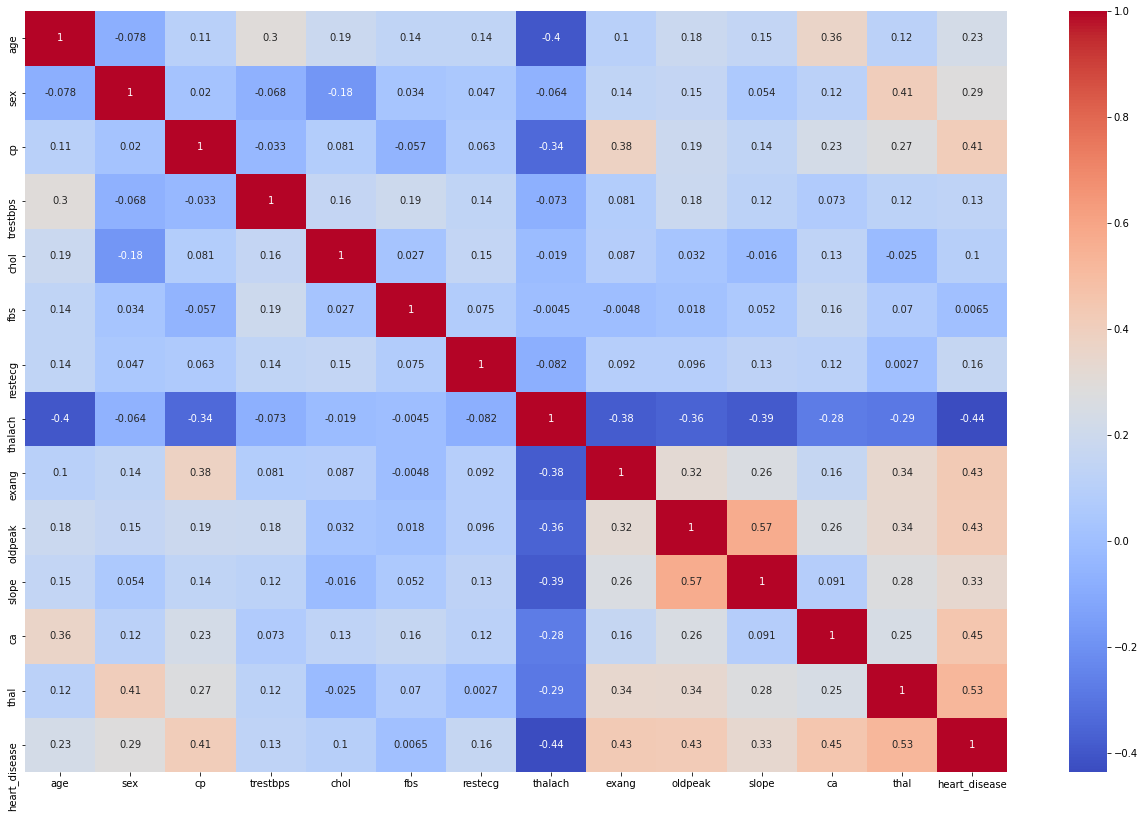

In [26]:
plt.figure(figsize=(22,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

<AxesSubplot:>

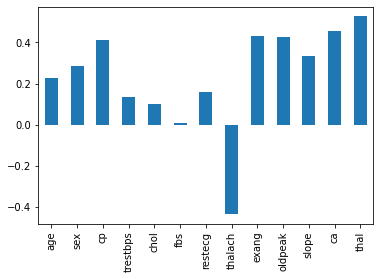

In [27]:
df.drop("heart_disease", axis=1).apply(lambda x: x.corr(df.heart_disease)).plot(kind='bar')

#### Plot absolute of correlations in descending order

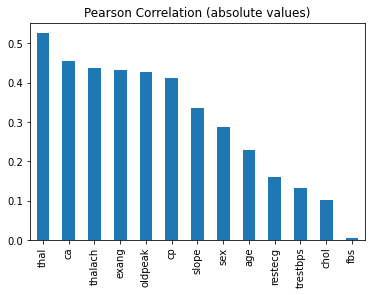

In [28]:
df.drop("heart_disease", axis=1).apply(lambda x: abs(x.corr(df.heart_disease))).sort_values(ascending=False).plot(kind='bar')
plt.title('Pearson Correlation (absolute values)')
plt.show()

#### Plot also Kendall and Spearman correlation to check for monotonic relations

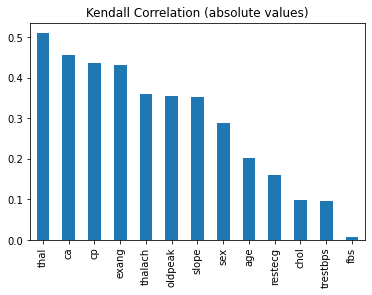

In [29]:
df.drop("heart_disease", axis=1).apply(lambda x: abs(x.corr(df.heart_disease, method='kendall'))).sort_values(ascending=False).plot(kind='bar')
plt.title('Kendall Correlation (absolute values)')
plt.show()

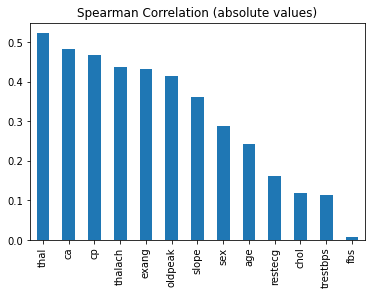

In [30]:
df.drop("heart_disease", axis=1).apply(lambda x: abs(x.corr(df.heart_disease, method='spearman'))).sort_values(ascending=False).plot(kind='bar')
plt.title('Spearman Correlation (absolute values)')
plt.show()

#### Least important features: 'fbs', 'trestbps', 'chol', 'restecg'

## ============================
# 3. Fitting models on the data
## ============================

First I choose 2 simple black box models on the data:
- 3a. Random Forest 
- 3b. XGBoost
The reasoning is that they work well on categorical data, they are relatively simple and fast to train. Moreover we can interpret locally their decisions using SHAP.

Finally I will fit a simple white-box model which is just a linear classifier
- 3c. Logistic Regression

## 3a. Fitting Random Forest  on the data
(using most important features)

In [31]:
X =  df.drop(['heart_disease', 'fbs', 'trestbps', 'chol', 'restecg'], axis=1)
Y = df['heart_disease']

In [32]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state=0)

## Hyperparameter tuning and Cross Validation
- If enough time can be more fine grained and search for more

In [33]:
# num of trees in forest
n_estimators = [100,400,800]
# Maximum tree depth
max_depth = [i for i in range(5,12)]
# Minimum num of samples required to split at a node
min_samples_split = [2, 4, 8]
# Minimum num of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
bootstrap = [True, False]
# Create the random grid
search_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

### Search for hyperparams (This took ~4min)

In [34]:
rf_clf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_clf, #param_distributions = search_grid, n_iter = 100, 
                             param_grid = search_grid, scoring='roc_auc' 
                             cv = 5, verbose=2, n_jobs = -1)

# Fit the random search model
rf_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 400, 800]},
             verbose=2)

In [36]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [37]:
max_depth = 10
# Build the model with the random forest regression algorithm:
rf_model = RandomForestClassifier(max_depth=max_depth, random_state=0,
                               bootstrap = True,  min_samples_leaf=5, 
                               min_samples_split= 2, n_estimators=100)

rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

print('depth', max_depth, 'accuracy:', accuracy_score(Y_test,Y_pred))

depth 10 accuracy: 0.847457627118644


<AxesSubplot:>

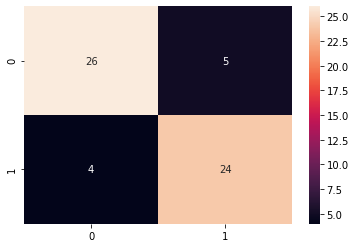

In [38]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [41]:
target_names = ['negative', 'heart_disease']
print(classification_report(Y_test, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

     negative       0.87      0.84      0.85        31
heart_disease       0.83      0.86      0.84        28

     accuracy                           0.85        59
    macro avg       0.85      0.85      0.85        59
 weighted avg       0.85      0.85      0.85        59



### Feature importance from forest

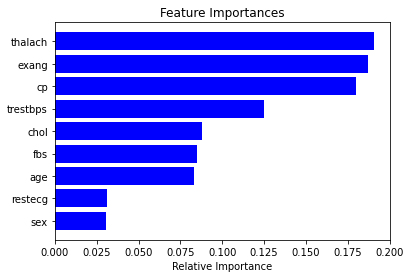

In [42]:
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
features = df.drop(['heart_disease'], axis=1).columns 
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature importance with SHAP

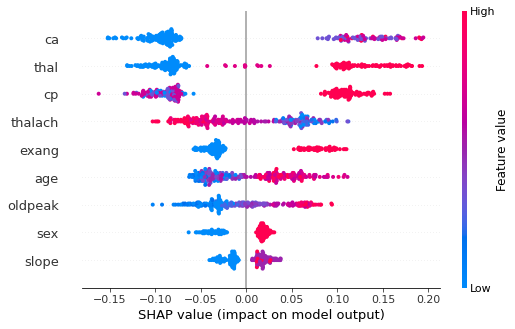

In [43]:
shap_values = shap.TreeExplainer(rf_model).shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

## ========================
## 3b. Fitting XGBOOST model 
## ========================

### Hyperparameter tuning ~2 min

In [44]:
params = {
        'min_child_weight': [1, 2, 5],
        'gamma': [0.5, 1, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6]
        }

xgb_model = xgboost.XGBClassifier()

In [45]:
grid_search = GridSearchCV(xgb_model, param_grid=params, verbose =2, 
                                 scoring='roc_auc', n_jobs=-1, cv=5)

In [46]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[01:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [47]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 4,
 'min_child_weight': 2,
 'subsample': 0.6}

In [52]:
max_depth = 5
# Build the model with the random forest regression algorithm:
xgb_model = xgboost.XGBClassifier(max_depth=4, min_child_weight=5, colsample_bytree = 1.0, 
                    subsample=0.6, eval_metric ='auc', gamma=2,random_state=0)

xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, eval_metric='auc',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
Y_pred = xgb_model.predict(X_test)

print('depth', max_depth, 'accuracy:', accuracy_score(Y_test,Y_pred))

depth 5 accuracy: 0.8305084745762712


<AxesSubplot:>

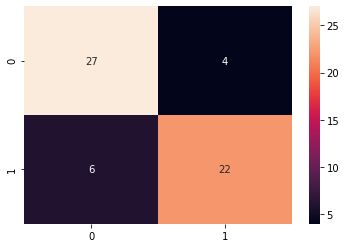

In [54]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [58]:
target_names = ['negative', 'heart_disease']
print(classification_report(Y_test, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

     negative       0.82      0.87      0.84        31
heart_disease       0.85      0.79      0.81        28

     accuracy                           0.83        59
    macro avg       0.83      0.83      0.83        59
 weighted avg       0.83      0.83      0.83        59



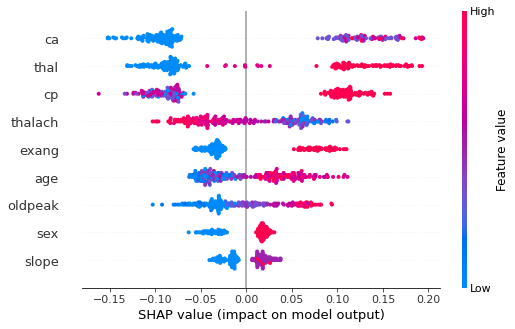

In [59]:
shap.summary_plot(shap_values[1], X_train)

In [60]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(xgb_model.predict(X_output),2)

### Explaining misclassifications with SHAP by providing local explanations

#### Get indicies of misclassifications

In [61]:
incorrect = (Y_pred != Y_test)
wrong_pred_idx = incorrect[incorrect].index
wrong_pred_idx

Int64Index([285, 171, 73, 22, 166, 268, 224, 175, 238, 161], dtype='int64')

#### Misclassifications

In [62]:
wrong_pred_df = df.drop(['heart_disease', 'fbs', 'trestbps', 'chol', 'restecg'], axis=1).iloc[wrong_pred_idx]
wrong_pred_df

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
285,63.0,0.0,4.0,136.0,1.0,0.0,2.0,0.0,3.0
171,52.0,1.0,4.0,147.0,0.0,0.1,1.0,3.0,7.0
73,65.0,1.0,4.0,158.0,0.0,0.6,1.0,2.0,6.0
22,58.0,1.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0
166,53.0,1.0,4.0,111.0,1.0,0.0,1.0,0.0,7.0
268,66.0,0.0,3.0,152.0,0.0,0.0,2.0,1.0,3.0
224,55.0,0.0,4.0,117.0,1.0,3.4,2.0,0.0,3.0
175,48.0,1.0,4.0,166.0,0.0,0.5,2.0,0.0,7.0
238,67.0,1.0,4.0,71.0,0.0,1.0,2.0,0.0,3.0
161,57.0,1.0,4.0,168.0,1.0,0.0,1.0,0.0,7.0


In [63]:
Y_pred_df = xgb_model.predict(wrong_pred_df)
Y_pred_df

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1.])

In [64]:
Y_test[wrong_pred_idx]

285    1.0
171    0.0
73     1.0
22     1.0
166    0.0
268    0.0
224    1.0
175    1.0
238    1.0
161    0.0
Name: heart_disease, dtype: float64

### Interpret the misclassifications with SHAP locally

In [1]:
#https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c
    
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))
sigmoid(3.03)

0.9539111729627203

In [65]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j,model, df):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(df)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], df.iloc[[j]])
    return(p)

In [66]:
wrong_pred_df.iloc[[1]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
171,52.0,1.0,4.0,147.0,0.0,0.1,1.0,3.0,7.0


In [7]:
sigmoid(3.03)

0.9539111729627203

In [67]:
shap_plot(1, xgb_model, wrong_pred_df)

In [ ]:
# sex, oldpeak, thalach,ca, thal and cp contribute to higher prediction
## Base value should be the mean value of the estimator over the whole input space.
# features are shorted by importance (cp more important than sex)

# sample 1 is predicted to be 3.03, which is much higher than the average 
#predicted value (~-0.11), mostly due to the specific values of features
# cp(4), thal(7), etc., and although slope is 1

In [68]:
wrong_pred_df.iloc[[2]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
73,65.0,1.0,4.0,158.0,0.0,0.6,1.0,2.0,6.0


In [2]:
sigmoid(-0.34)

0.4158094770645927

In [69]:
shap_plot(2, xgb_model, wrong_pred_df)

In [70]:
wrong_pred_df.iloc[[3]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
22,58.0,1.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0


In [3]:
sigmoid(-1.83)

0.13823827317249404

In [71]:
shap_plot(3, xgb_model, wrong_pred_df)

In [72]:
wrong_pred_df.iloc[[4]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
166,53.0,1.0,4.0,111.0,1.0,0.0,1.0,0.0,7.0


In [4]:
sigmoid(2.06)

0.8869541699279211

In [73]:
shap_plot(4, xgb_model, wrong_pred_df)

In [74]:
wrong_pred_df.iloc[[5]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
268,66.0,0.0,3.0,152.0,0.0,0.0,2.0,1.0,3.0


In [5]:
sigmoid(0.55)

0.6341355910108007

In [75]:
shap_plot(5, xgb_model, wrong_pred_df)

In [76]:
wrong_pred_df.iloc[[6]]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
224,55.0,0.0,4.0,117.0,1.0,3.4,2.0,0.0,3.0


In [6]:
sigmoid(-0.19)

0.45264238185691075

In [77]:
shap_plot(6, xgb_model, wrong_pred_df)

## 3c. Fitting Logistic Regression (white-box model)

Need to min-max scale the data before passing it as input to Logistic Regression

In [78]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled= scaler.fit_transform(df)  #numpy.ndarray

#### Convert back to dataframe

In [79]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns.to_list())
df_scaled[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,0.708333,1.0,0.0,0.481132,0.367698,1.0,1.0,0.603053,0.0,0.410714,1.0,0.0,0.75,0.0
1,0.791667,1.0,1.0,0.622642,0.549828,0.0,1.0,0.282443,1.0,0.267857,0.5,1.0,0.00,1.0


In [80]:
df_scaled_reduced = df_scaled.drop(['fbs', 'restecg', 'trestbps', 'chol'], axis=1)

In [81]:
X =  df_scaled_reduced.drop(['heart_disease'], axis=1)
X[:2]

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.0,0.603053,0.0,0.410714,1.0,0.0,0.75
1,0.791667,1.0,1.0,0.282443,1.0,0.267857,0.5,1.0,0.00


In [82]:
Y = df_scaled_reduced['heart_disease']

In [83]:
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state=0)

## Grid Search to choose C and penalty on logistic Regression

In [84]:
log_reg = LogisticRegression()
log_reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [91]:
param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-10, 10, 50),
}
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, scoring='roc_auc', n_jobs=-1)
best_clf = clf.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [92]:
best_clf.best_params_

{'C': 4.094915062380419, 'penalty': 'l2'}

In [93]:
log_reg = LogisticRegression(C = 4.094915062380419, 
                             penalty ='l2')

In [94]:
log_reg.fit(X_train,Y_train)

Y_pred = log_reg.predict(X_test)

In [95]:
print(accuracy_score(Y_test,Y_pred))

0.8983050847457628


<AxesSubplot:>

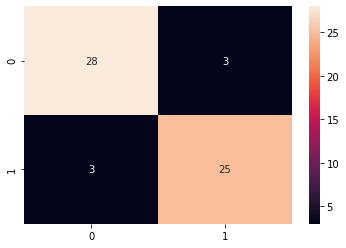

In [96]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [97]:
Y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(Y_test, Y_pred_prob)
auc = metrics.roc_auc_score(Y_test, Y_pred_prob)

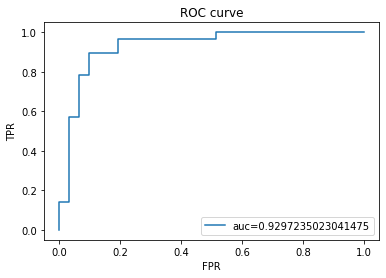

In [98]:
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

### Conclusion
After visualizing feature importance with different techniques the most important features extracted from the data were ‘ca’ ‘thal’ ‘cp’ ‘thalach’ ‘exang’ ‘oldpeak’ and the least important ‘fbs’, ‘restecg’ ‘trestbps’. The features ‘thalach’ (maximum heart rate achieved) and ‘fbs’ (fasting blood sugar) were negative correlated with heart disease meaning that increase in values of ‘thalach’ decrease the chance of heart disease. The rest of variables were positively correlated with heart disease. More specifically:
- Heart disease is more likely to affect men than women (i.e. men have higher probability to be affected by heart diseases). People of higher age more likely to have heart disease.
- Higher caregories in chest pain type (3,4), number of major vessels (2,3), resting electrocardiographic results (1,2) and slope (2,3) increase the change of having heart disease according to the model fit on the data.
- Slightly higher values in resting blood sugar (trestbps), serum cholestoral (chol) increase the chance of having heart disease according to the model fit on the data, although these were not significant.

### Further future steps
- Look at missclassifications or regions of high error to find potential outliers. Remove them and retrain to improve model performance. 
- Look for patterns in missclassifications. Utilize supervised or unsupervised clsutering approaches and fit a model to each cluster for improved performance.
- Train many different models on the data e.g. Logistic Regression, Suppport Vector Machine, Random Forest, Naïve Bayes Classifier, XGBoost, CatBoost etc.. Then use a MetaClassifier (stacking see: sklearn.ensemble.StackingClassifier — scikit-learn 0.24.2 documentation) that combines the predictions of multiple learners for improved performance.
